In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
nlp = spacy.load("en_core_web_lg")

In [3]:
df = pd.read_csv('data/Tweets.csv')

In [4]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [5]:
data = df[['airline_sentiment', 'text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
#docs = [nlp(t) for t in data.text]

In [7]:
y = df['airline_sentiment']
X = df['text']

In [8]:
docs = [nlp(t) for t in X]
vecs = [d.vector for d in docs]

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(vecs, y, test_size=0.20, random_state=40)

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
knn.score(X_test, y_test)

0.7305327868852459

In [13]:
# for a, b in combinations(docs, 2):
#     print(a.similarity(b), 'A:', a, 'B:', b)

#part II

In [23]:
km = KMeans(n_clusters=3).fit(vecs)

In [24]:
pca = PCA(n_components =2)

In [25]:
pca.fit(vecs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
word_vecs_2d = pca.transform(vecs)
word_vecs_2d

array([[ 0.4438717 ,  0.11260919],
       [-0.14297904,  0.1162208 ],
       [-0.74147169,  0.5389883 ],
       ...,
       [ 0.86383811, -0.08452885],
       [-0.78980691,  0.30801134],
       [-0.32344589, -0.1477386 ]])

<function matplotlib.pyplot.show(*args, **kw)>

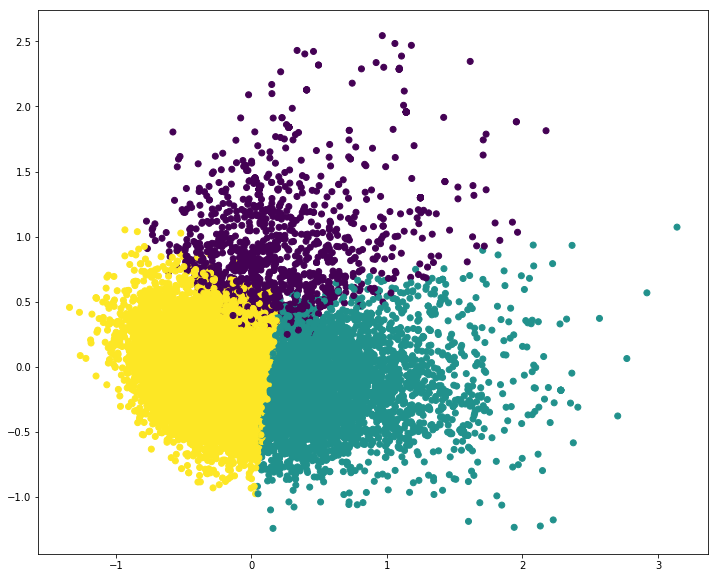

In [28]:
plt.figure(figsize =(12,10))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:,1], c=km.labels_)
# for word, (x,y) in zip(vecs, word_vecs_2d):
#    plt.text(x,y, word)
plt.show

In [ ]:
plt.figure(figsize =(10,5))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:,1])
for word, (x,y) in zip(words, word_vecs_2d):
    plt.text(x,y, word)
plt.show